# Aviation Crash Data Analysis 

<center><img src="./images/Header.png" 
    Width="1000">|

## 1. Business Understanding 

### 1.1. Business Objective
This project analyzes the [aviation accident dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) on Kaggle (Note that the actual data we're using is located [here](https://github.com/learn-co-curriculum/dsc-phase-1-project-v3/tree/master/data)). The findings will be used to make recommendations to stakeholders that may be looking to expand their business through purchasing and operating airplanes for commercial and private enterprises. 

### 1.2. Background Information
Before proceeding any further, we do some research to gain some domain knowledge. Different measures could be considered for assessing the safety of aircrafts. For example, the *number of fatal crashes per every 100,000 flights* seems like a standard measure to consider. The *number of non-fatal incidents that led to injuries* or required the pilot to take extreme measures for landing the aircraft may be considered as a secondary measure [REF](https://assets.performance.gov/APG/files/2023/june/FY2023_June_DOT_Progress_Aviation_Safety.pdf).

Some aspects of safety we can investigate are: 
- aircraft make and model: certain models may be more susciptible to incidents due to inherent manufacturing/design flaws.
- number of engines: a 4-engine aircraft should be safer compared to a 2-engine one
- engine type: some engine types may be more susciptible to failures than others.  
- location: certain regions may have higher number of fatal aviation accidents. Factors like weather, terrain topography and the location being a hub for certain activities may contribute to these statistics. 

### 1.3. Data Mining Goals
A successful mining of the data would determine potentail factors that affect the safety of aircrafts. The correlation of each factor to aircraft safety and the strength of such correlation will provide insights to identify the lowest-risk aircrafts that the client can start its business endeavor with. 

### 1.4. Project Plan
We will first skim the data provided to get a preliminary understanding of what's available, whether it's clean and ready for use. Next, we will determine the useful data for our analysis. This portion of the data will be prepared, cleaned and organized. In the end, we will use insights from the data along with visualizations to make appropriate business recommendations. As a complementary part, limitations of the work along with potential future investigations will be highlighted.   

## 2. Data Understanding

In this section, we take a first look at the data to get a preliminary understanding of its type and what it contains. 

In [36]:
# importing the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 2.1. Data Description
We use the [aviation accident dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) available on Kaggle.

In [37]:
# read the data 
df = pd.read_csv("./data/Aviation_Data.csv",low_memory=False)
# inspect the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [38]:
print(f"The data has {len(df)} rows and {len(df.columns)} columns.")

The data has 90348 rows and 31 columns.


Let's take a look at some statistics for the numerical data: 

In [39]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


We note that the median for three of the columns is zero. This suggests that more than half the data contains zero for these columns. We also note that the means are close to 0. This statistics seem to suggest that the data may be skewed towards smaller aircrafts compared to medium and large ones. In the data preparation section, we will try to address this issue. 

### 2.2. Improving Aesthetics/Readability

In [40]:
# replace . with _ in columns names to increase readability/facilitate use of column names 
df.rename(columns=lambda x: x.replace('.','_'),inplace=True)
# standardize the capitalization of column names
df.columns = [column.capitalize() for column in df.columns]
df.rename(columns={"Far_description": "FAR_description"},inplace=True)

In [41]:
# taking a peak at a few rows of the data
pd.set_option('display.max_columns', None)
df.head(5)

,Event_id,Investigation_type,Accident_number,Event_date,Location,Country,Latitude,Longitude,Airport_code,Airport_name,Injury_severity,Aircraft_damage,Aircraft_category,Registration_number,Make,Model,Amateur_built,Number_of_engines,Engine_type,FAR_description,Schedule,Purpose_of_flight,Air_carrier,Total_fatal_injuries,Total_serious_injuries,Total_minor_injuries,Total_uninjured,Weather_condition,Broad_phase_of_flight,Report_status,Publication_date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### 2.3. Improve Understanding of the Data

In [42]:
# Take a look at some of the categorical data you don't fully understand
print('Categorical data for Broad phase of flight:')
print(df["Broad_phase_of_flight"].unique(),'\n')

print('Categorical data for FAR description:')
print(df["FAR_description"].unique(),'\n')

print('Categorical data for Engine type:')
print(df["Engine_type"].unique())

Categorical data for Broad phase of flight:
['Cruise' 'Unknown' 'Approach' 'Climb' 'Takeoff' 'Landing' 'Taxi'
 'Descent' 'Maneuvering' 'Standing' 'Go-around' 'Other' nan] 

Categorical data for FAR description:
[nan 'Part 129: Foreign' 'Part 91: General Aviation'
 'Part 135: Air Taxi & Commuter' 'Part 125: 20+ Pax,6000+ lbs'
 'Part 121: Air Carrier' 'Part 137: Agricultural'
 'Part 133: Rotorcraft Ext. Load' 'Unknown' 'Part 91F: Special Flt Ops.'
 'Non-U.S., Non-Commercial' 'Public Aircraft' 'Non-U.S., Commercial'
 'Public Use' 'Armed Forces' 'Part 91 Subpart K: Fractional' '091' 'NUSC'
 '135' 'NUSN' '121' '137' '129' '133' '091K' 'UNK' 'PUBU' 'ARMF' '103'
 '125' '437' '107'] 

Categorical data for Engine type:
['Reciprocating' nan 'Turbo Fan' 'Turbo Shaft' 'Unknown' 'Turbo Prop'
 'Turbo Jet' 'Electric' 'Hybrid Rocket' 'Geared Turbofan' 'LR' 'NONE'
 'UNK']


**Important Notes:**
- The data has 31 columns. There are two data types: object (string/text) and float. We note that the float data type seems appropriate for the columns listed (i.e., number of engines, total fatal/serious/minor injuries, and total uninjured). An int type may be more appropriate for these categories but changing the data type might introduce unwanted issues when performing statistical analysis so we will keep it as is for now. 
- Notice that some columns have substantial amount of missing data. We will address this in more detail in the next sections (Data Preparation and EDA).
- I took some time to make sure I understand what each column represents and brainstorm whether it can be leveraged for the type of analysis we're doing. Below, I will include explanation on a number of items that were not clear to me:
    - **Investigation type:** incident vs. accident. Incidents refer to occurrences that do not result in signifcant damage to the aircraft.
    - **Weather condition:** IMC (Instrument Meteorological Conditions) and VMC (Visual Meteorological Conditions). The former is associated with reduced visibility while the latter usually corresponds to clear skies. 
    - **FAR description:** Represents descriptions or codes that specify which specific Federal Aviation Regulations are relevant to each accident. Recurrent FAR violations in certain categories (such as maintenance) can be raise red flags for aviation companies.
    - **Engine type:** includes reciprocating, turbo jet, etc. Engine type has been documented to have an effect with aircraft safety [REF](https://dk.upce.cz/bitstream/handle/10195/74791/Use_of_Aircraft_Engine_Type_and_Quantity_and_their_Impact_on_Air_Transport_Safety.pdf?sequence=1&isAllowed=y).
    - **Broad phase of flight:** indicates the phase of flight at which the accident or incident happened. Includes categorical data such as "Cruise", "Taxi", etc. This may be useful for identifying risks associated with each phase of flight, but may not be necessarily relevant to our analysis.
    - **Report status:** This item shows whether the report on the accident is at its final stage or it's developing.

### 2.4. Summary: 
1. The data has **90348** rows and **31** columns.
2. The categorical and numerical data included are relevant to answer the question we're after.
3. The preliminary look at the data shows that some of the important columns have several NaNs and missing data. This may limit our analysis and findings.
4. We note that the median for three of the columns containing numerical data is zero. This suggests that more than half the data contains zero for these columns. We also note that the means are close to 0. This statistics seem to suggest that the data may be skewed towards smaller aircrafts compared to medium and large ones. In the data preparation section, we will try to address this issue.
5. Based on what was discussed above, the following features will be of interest for our analysis: event date, investigation type, location, country, injury severity, aircraft damage, aircraft category, make, model, number of engines, engine type, FAR description, air carrier, total injuries and total fatal/serious/minor injuries, total uninjured, and weather condition.

## 3. Data Preparation

### 3.1. Converting Data Types
We start by changing the data type for the event date. The event date is of importance since trends and patterns in aviation accidents may be time-dependent (e.g. a company with high number of accidents in the past may have become a reliable aviation company later on). 

In [43]:
df.Event_date = pd.to_datetime(df.Event_date)

### 3.2. Handling Missing Values

In [44]:
# check for the percentage of missing data in each category
df.isna().sum()/len(df)*100

Event_id                   1.614867
Investigation_type         0.000000
Accident_number            1.614867
Event_date                 1.614867
Location                   1.672422
Country                    1.865011
Latitude                  61.944924
Longitude                 61.954886
Airport_code              44.512330
Airport_name              41.665560
Injury_severity            2.721698
Aircraft_damage            5.150086
Aircraft_category         64.263736
Registration_number        3.144508
Make                       1.684597
Model                      1.716695
Amateur_built              1.727764
Number_of_engines          8.348829
Engine_type                9.468942
FAR_description           64.555939
Schedule                  86.073848
Purpose_of_flight          8.468367
Air_carrier               81.573471
Total_fatal_injuries      14.233851
Total_serious_injuries    15.461327
Total_minor_injuries      14.822686
Total_uninjured            8.158454
Weather_condition          6

We can see that several categories have a lot of missing data (over 50%). Among the data we said we care about in the previous section, "FAR_description", "Aircraft_category" and "Air_carrier" are also part of the categories with a high percentage of missing data. We need to make a decision about how we will handle the missing portion of the data. We can either drop the rows and/or columns or replace the missing data with the most frequent category. Dropping the rows or replacing them is not a good option since we would be throwing away a lot of data. The best option is to drop all columns that have more missing data than a certain threshold value. We assume this **threshold value** to be **30%**. Dropping "Aircraft_category" and "Air_carrier" may seem like a bad idea but we have the "Make" and "Model" columns to rely on. 

In [45]:
# drop columns with more than 30% of missing rows. 
df.dropna(axis=1,thresh=np.round(0.7*len(df)),inplace=True)

We also notice that some of the columns contain data that's not required for our analysis. We will drop those columns and only keep the ones we need: Event_date, Location, Country, Injury_severity, Make, Model, Number_of_engines, Engine_type, Total_fatal_injuries, Total_serious_injuries, Total_minor_injuries, Total_uninjured, Weather_condition.

In [46]:
cols_to_keep = ["Event_date", "Location", "Country", "Injury_severity", "Make", "Model", "Number_of_engines", "Engine_type", "Total_fatal_injuries", "Total_serious_injuries", "Total_minor_injuries", "Total_uninjured", "Weather_condition","Purpose_of_flight"]
df_subset=df[cols_to_keep];
df_subset.head()

,Event_date,Location,Country,Injury_severity,Make,Model,Number_of_engines,Engine_type,Total_fatal_injuries,Total_serious_injuries,Total_minor_injuries,Total_uninjured,Weather_condition,Purpose_of_flight
0,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Stinson,108-3,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,Personal
1,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Piper,PA24-180,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,Personal
2,1974-08-30,"Saltville, VA",United States,Fatal(3),Cessna,172M,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC,Personal
3,1977-06-19,"EUREKA, CA",United States,Fatal(2),Rockwell,112,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Personal
4,1979-08-02,"Canton, OH",United States,Fatal(1),Cessna,501,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Personal


We note that the "Injury_severity" column is storing the count for fatal injuries inside a paranthesis in front of the mtype of injury. This is inconvenient since if we use groupby, fatal injuries of different kinds will be treated as different categories while they're all actually one category. We fix this as follows:

In [47]:
df_subset["Injury_severity"]=df_subset["Injury_severity"].str.split('(').str[0]
df_subset.head()

C:\Users\setar\AppData\Local\Temp\ipykernel_4696\2247802715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["Injury_severity"]=df_subset["Injury_severity"].str.split('(').str[0]


,Event_date,Location,Country,Injury_severity,Make,Model,Number_of_engines,Engine_type,Total_fatal_injuries,Total_serious_injuries,Total_minor_injuries,Total_uninjured,Weather_condition,Purpose_of_flight
0,1948-10-24,"MOOSE CREEK, ID",United States,Fatal,Stinson,108-3,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,Personal
1,1962-07-19,"BRIDGEPORT, CA",United States,Fatal,Piper,PA24-180,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,Personal
2,1974-08-30,"Saltville, VA",United States,Fatal,Cessna,172M,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC,Personal
3,1977-06-19,"EUREKA, CA",United States,Fatal,Rockwell,112,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Personal
4,1979-08-02,"Canton, OH",United States,Fatal,Cessna,501,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Personal


We note that there are some unknown values in several of the columns that are technically nans. We attempt to convert these to nans and check the amount of missing data in this column again. 

In [48]:
str_to_nan = ['UNK','Unk','Unknown']
df_subset=df_subset.applymap(lambda x: np.nan if x in str_to_nan else x)
df_subset.isna().sum()/len(df)*100

C:\Users\setar\AppData\Local\Temp\ipykernel_4696\3862996511.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_subset=df_subset.applymap(lambda x: np.nan if x in str_to_nan else x)


Event_date                 1.614867
Location                   1.673529
Country                    1.868331
Injury_severity            2.721698
Make                       1.707841
Model                      1.721123
Number_of_engines          8.348829
Engine_type               11.740160
Total_fatal_injuries      14.233851
Total_serious_injuries    15.461327
Total_minor_injuries      14.822686
Total_uninjured            8.158454
Weather_condition          7.824191
Purpose_of_flight         15.997034
dtype: float64

We note that the remaining data does not have much missing values (a maximum of 15% among columns). We choose to drop these rows to get clean data we can easily work with.

In [49]:
df_subset.dropna(axis=0,inplace=True)

Let's take a look at the length of this dataset compared to the original one to make sure we haven't ommitted a significant amount of data. 

In [50]:
print("The percentage of retained data is:", len(df_subset)/len(df)*100)

The percentage of retained data is: 64.05675831230354


In [51]:
df_subset.isna().sum()

Event_date                0
Location                  0
Country                   0
Injury_severity           0
Make                      0
Model                     0
Number_of_engines         0
Engine_type               0
Total_fatal_injuries      0
Total_serious_injuries    0
Total_minor_injuries      0
Total_uninjured           0
Weather_condition         0
Purpose_of_flight         0
dtype: int64

Let's take a look at the Country column and see how much data we have on each country. 

### 3.3. Filtering and Cleaning

We justify filtering the data based on **country** as follows: 

In [52]:
df_subset['Country'].value_counts()
print(df_subset['Country'].value_counts().max()/len(df_subset))

0.9933476172374469


Data from the US comprises 99% of the data. This is a huge portion. Data entries from other countries may not be enough for making a good decision. Therefore, we will drop any rows with data on countries other than the US. We will also change the **Location** column such that it only contains the abbreviation for the name of the **state**. 

In [53]:
df_subset = df_subset[df_subset["Country"]=="United States"]
df_subset["Location"]=df_subset["Location"].str.split(',').str[1].str.strip()
print(df_subset["Location"].unique().tolist())

['CA', 'MN', 'WA', 'NJ', 'FL', 'NM', 'AL', 'LA', 'TX', 'OK', 'AR', 'UT', 'AK', 'PA', 'MI', 'VA', 'NC', 'NY', 'MT', 'OR', 'IN', 'AZ', 'MO', 'WY', 'IL', 'SC', 'MD', 'OH', 'CO', 'VT', 'GA', 'KS', 'DC', 'NH', 'IA', 'MS', 'ID', 'WI', 'NV', 'CT', 'KY', 'HI', 'TN', 'MA', 'ME', 'SD', 'NE', 'ND', 'RI', 'WV', 'DE', 'OAHU', 'PR', 'MAUI', 'GU', 'KAUAI', 'GM', 'San Juan Is.', 'PO', '', 'Maui', 'AO']


It mostly worked except for some locations in Hawaii, a location that ended up as an empty string and San Juan Is. which is part of the Washington state. Let's **fix these few odd ones manually**. 

In [54]:
hi_dict =  {"MANU'A": "HI", "MAUI": "HI","KAUAI": "HI", "MOLOKAI": "HI","Maui": "HI","OAHU": "HI", "San Juan Is.": "WA"}
df_subset["Location"]=df_subset["Location"].replace(hi_dict)
print(df_subset["Location"].unique().tolist())

['CA', 'MN', 'WA', 'NJ', 'FL', 'NM', 'AL', 'LA', 'TX', 'OK', 'AR', 'UT', 'AK', 'PA', 'MI', 'VA', 'NC', 'NY', 'MT', 'OR', 'IN', 'AZ', 'MO', 'WY', 'IL', 'SC', 'MD', 'OH', 'CO', 'VT', 'GA', 'KS', 'DC', 'NH', 'IA', 'MS', 'ID', 'WI', 'NV', 'CT', 'KY', 'HI', 'TN', 'MA', 'ME', 'SD', 'NE', 'ND', 'RI', 'WV', 'DE', 'PR', 'GU', 'GM', 'PO', '', 'AO']


We will also **clean the Make column** to unify some of the categories that are considered separately because of a difference in spelling. Let's first take a look at how many redundant categories are being identified just because of spelling differences:

In [55]:
len(df_subset["Make"].unique().tolist())-len(df_subset["Make"].str.title().unique().tolist())

423

There are **423** redundant categories in the Make column if we do not unify the capitalization of the names. 

In [56]:
df_subset["Make"] = df_subset["Make"].str.title()

#### Digression: Is it justified to consider ratios instead of absolute values? 

We note that the number of fatal/serious/minor injuries in each incident represents the absolute value. How fatal an incident also depends on how many people out of everyone onboard sustained injuries. Here, we investigate whether considering relative ratios ionstead of absolute values is more appropriate. 

We will assume that the sum of the "Total_fatal_injuries", "Total_serious_injuries", "Total_minor_injuries" and "Total_uninjured" gives the number of people on board. We will add 3 columns to the dataframe that shows that percentage of injuries for the number of people onboard instead of just absolute numbers. 

In [57]:
df_subset["Total_onboard"]=df_subset["Total_fatal_injuries"]+df_subset["Total_serious_injuries"]+df_subset["Total_minor_injuries"]+df_subset["Total_uninjured"]
df_subset["Total_fatal_injuries_ratio"]=df_subset["Total_fatal_injuries"]/df_subset["Total_onboard"]
df_subset["Total_serious_injuries_ratio"]=df_subset["Total_serious_injuries"]/df_subset["Total_onboard"]
df_subset["Total_minor_injuries_ratio"]=df_subset["Total_minor_injuries"]/df_subset["Total_onboard"]
df_subset["Total_uninjured_ratio"]=df_subset["Total_uninjured"]/df_subset["Total_onboard"]
#df_subset.tail(200)

In [58]:
# categorize the size of the airplane based on the number of people onboard. 
bins = [0,5, 20, 150, df_subset["Total_onboard"].max()]
labels = ['very small aircraft','small aircraft', 'medium aircraft', 'large aircraft']

df_subset['Aircraft_size'] = pd.cut(df_subset['Total_onboard'], bins=bins, labels=labels, right=False)

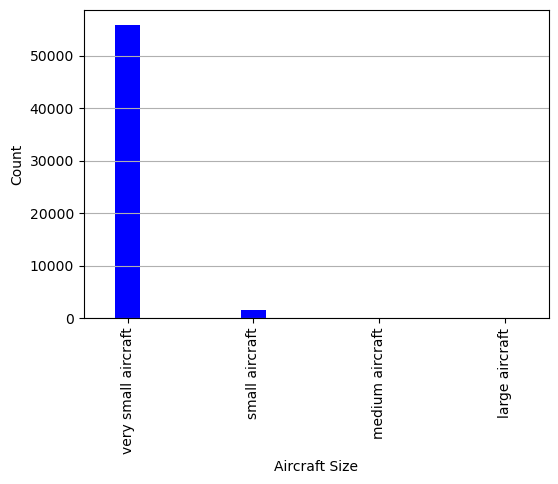

In [59]:
ax=df_subset['Aircraft_size'].value_counts().plot(kind='bar', figsize=(6,4),xlabel="Aircraft Size", ylabel="Count", width=0.2, color="blue");
ax.grid(axis="y")

Note that the majority of the aviation accidents is for aircrafts containing fewer than or equal to 5 passengers. This is indeed surprising but explains the close-to-zero means and the zero medians for numerical data. This categorization is inevitable if we want our analysis to be reasonable. Taking a look at the "Purpose of flight" column, we will see that the "Personal" category (associated with recreational flying, private transportation, flying as a hobby or passion) has the highest count. Aircrafts used for this purpose are usually very small so both figures are telling a consistent story. 

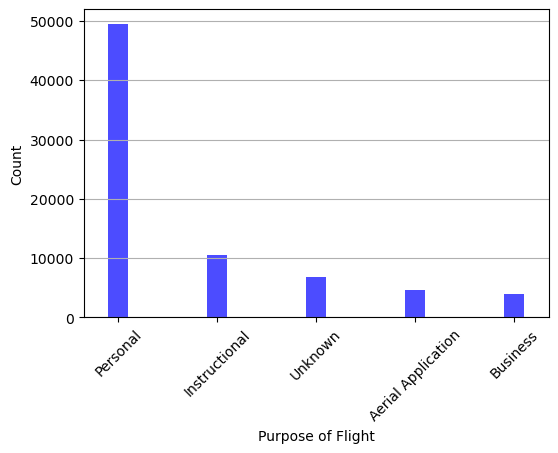

In [60]:
ax=df['Purpose_of_flight'].value_counts().sort_values(ascending=False).iloc[0:5].plot(kind='bar', figsize=(6,4),xlabel="Purpose of Flight", ylabel="Count",width=0.2,color="blue",alpha=0.7);
ax.grid(axis="y")
ax.set_xticklabels(df['Purpose_of_flight'].value_counts().sort_values(ascending=False).iloc[0:5].index,rotation=45);

In [61]:
cols_to_agg = ["Total_fatal_injuries","Total_onboard","Total_fatal_injuries_ratio", "Total_serious_injuries_ratio","Total_minor_injuries_ratio"]
df_subset.groupby("Aircraft_size")[cols_to_agg].agg(["median","mean","std"])

C:\Users\setar\AppData\Local\Temp\ipykernel_4696\3591211457.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_subset.groupby("Aircraft_size")[cols_to_agg].agg(["median","mean","std"])


Total_fatal_injuries                      Total_onboard  \
                                  median      mean        std        median   
Aircraft_size                                                                 
very small aircraft                  0.0  0.289206   0.725640           2.0   
small aircraft                       0.0  1.307138   2.389217           5.0   
medium aircraft                      0.0  3.653846  16.049778          54.5   
large aircraft                       0.0  0.166667   0.408248         178.0   

                                           Total_fatal_injuries_ratio  \
                           mean        std                     median   
Aircraft_size                                                           
very small aircraft    1.720413   0.866553                        0.0   
small aircraft         6.051081   1.823111                        0.0   
medium aircraft       61.461538  37.867380                        0.0   
large aircraft       192.500000  43.857725                        0.0   

                                        Total_serious_injuries_ratio  \
                         mean       std                       median   
Aircraft_size                                                          
very small aircraft  0.160688  0.358669                          0.0   
small aircraft       0.218650  0.383845                          0.0   
medium aircraft      0.046967  0.178739                          0.0   
large aircraft       0.001048  0.002568                          0.0   

                                        Total_minor_injuries_ratio            \
                         mean       std                     median      mean   
Aircraft_size                                                                  
very small aircraft  0.113427  0.294764                        0.0  0.136621   
small aircraft       0.087358  0.203117                        0.0  0.104861   
medium aircraft      0.021610  0.048781                        0.0  0.128072   
large aircraft       0.001048  0.002568                        0.0  0.000000   

                               
                          std  
Aircraft_size                  
very small aircraft  0.320721  
small aircraft       0.226323  
medium aircraft      0.278428  
large aircraft       0.000000

The statistics shown in the table above are now more representative of the data. The median for total fatal injuries is still zero. This is okay and only indicates that more than half of the accidents in each category did not lead to fatal injuries. At this point, we need to decide whether the ratios we computed are an appropriate metric to use for aircraft safety considering the rarity of moderate or large fatal injury ratios. A more appropriate (and restrictive) metric to use seems to be whether the incident was classified as "fatal" or not. The number of accidents classified as fatal can then be used as a metric to base the analysis on. 

Based on the discussion above, we will remove the columns we added that consider ratios from the dataset. We will also drop all information on how many fatal, serious or minor injuries the incidents had and **will solely rely on the injury severity classification to continue the analysis**.

In [62]:
cols_to_drop = ["Total_fatal_injuries_ratio","Total_serious_injuries_ratio", "Total_minor_injuries_ratio", "Total_uninjured_ratio","Total_fatal_injuries","Total_serious_injuries", "Total_minor_injuries", "Total_uninjured"]
df_subset.drop(columns=cols_to_drop,inplace=True)
df["Purpose_of_flight"].isna().sum()/len(df)
#df_subset["Purpose_of_travel"]=df["Purpose_of_travel"]
#df_subset.head()

0.08468366759640501

### 3.4. Summary
1. The analysis will be limited to US only (note that our analysis showed 98% of the data is for the US anyway, so this shouldn't have a huge implication anyway).
2. We will use ratios instead of absolute values for the analysis since absolute number of fatalities without information on how many passengers were on board is not a good metric to consider.
3. After handling the missing values appropriately, about 71% of the original data remains to be analyzed.
4. We categorized the size of the airplane based on the number of people onboard since the database was skewed towards very small aircrafts (with fewer than 5 people on board) and the statistics were not representative of other aircraft sizes. After doing so, we observed that the fatal injury ratios are in general very small. This means we need to rethink using this metric for aircraft safety. Instead, we base our analysis on the number of accidents classified as fatal. 

## 4. Data Analysis

In this section, we analyze and visualize the data further to identify factors that affect aircraft safety. Business recommendations will be made based on the findings in this section. 

### 4.1. Location

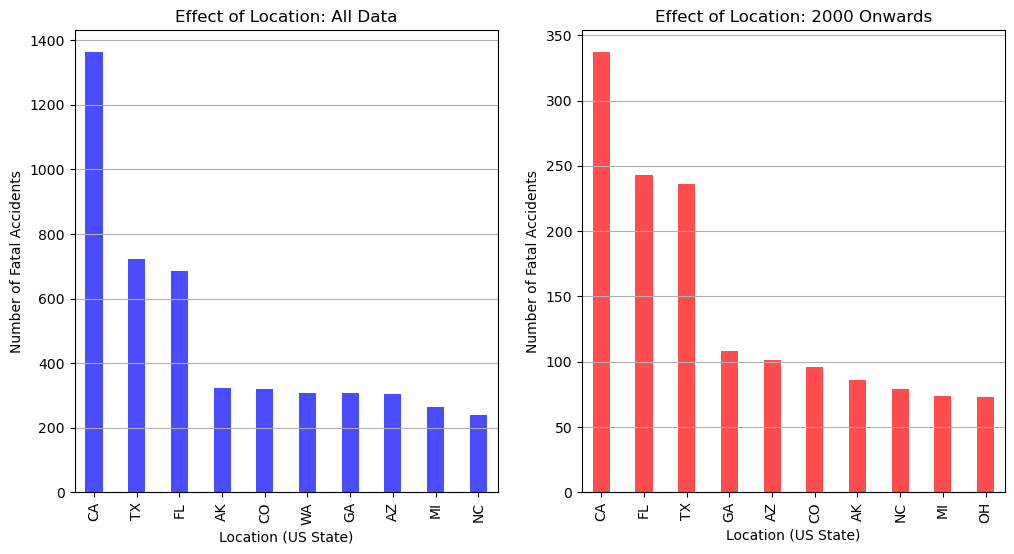

In [63]:
grouped_by_loc = df_subset[(df_subset["Injury_severity"]=="Fatal")].groupby(['Location'])

# Making sure the trend holds in the recent years 
grouped_by_loc_2000 = df_subset[(df_subset["Injury_severity"]=="Fatal") & (df_subset["Event_date"].dt.year>=2000)].groupby(['Location'])

fig1,ax1=plt.subplots(1,2,figsize=(12,6))
grouped_by_loc.size().sort_values(ascending=False).iloc[0:10].plot(kind="bar",ax=ax1[0],xlabel="Location (US State)", ylabel="Number of Fatal Accidents", title="Effect of Location: All Data",width=0.4,color="blue",alpha=0.7);
ax1[0].grid(axis="y")

grouped_by_loc_2000.size().sort_values(ascending=False).iloc[0:10].plot(kind="bar",ax=ax1[1],xlabel="Location (US State)", ylabel="Number of Fatal Accidents", title="Effect of Location: 2000 Onwards",width=0.4,color="red",alpha=0.7);
ax1[1].grid(axis="y")

plt.savefig("./figures/effect_of_location.png")

**Observations:** 
1. Regardless of whether we consider the data from 2000 onwards or not, California, Texas and Florida have the highest number of accidents classified as fatal among all states. Although, Texas and Florida have swapped places over the years.
2. In 4th rank onwards, most states that appear in the left subfigure appear in the right subfigure as well except for Washington which has given its place to Ohio from 2000 onwards (although they don't share the same rank).

**Important Notes:** 
1. Note that we do not have access to the total number of flights that takes place in each state to normalize these results. It would be a better idea to consider the number of fatal accidents divided by the total number of all inbound/outbound flights in a specific location.
2. One might argue that we can use the the ratio of accidents classified as fatal divided by total number of accidents in a location for this study. However, such a metric would over-exaggerate the importance of locations with very low number of accidents whose only accidents have been fatal (essentially a ratio of 1).
3. Bound to the limitations explained, we continue using the total number of fatal accidents as the metric of choice.  

### 4.2. Purpose of Flight

We can further identify the major cause of fatal accidents in each state by looking at the purpose of flight. Let's do that for the first three states that appear in the above figure (i.e. California, Texas, Florida). We only consider data for 2000 onwards to remain more relevant. 

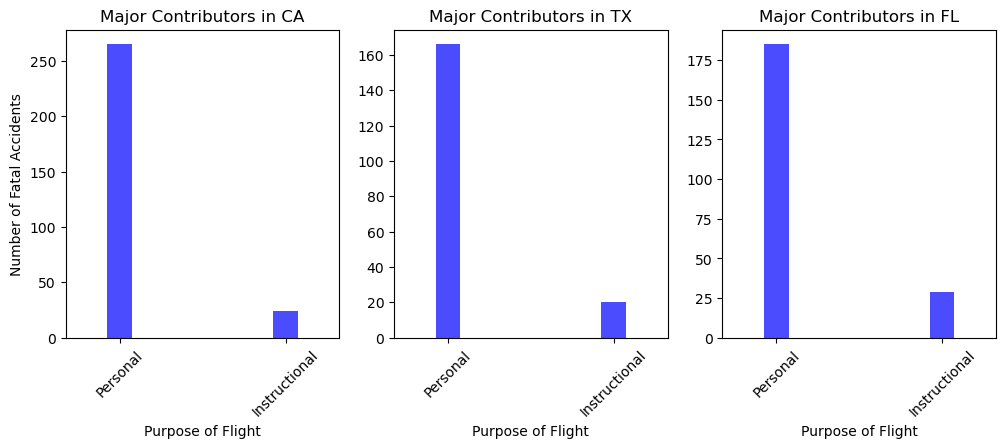

In [64]:
fig2,ax2 = plt.subplots(1,3,figsize=(12,4))
top_locs = ["CA","TX","FL"]

for i in range(0,3): 
    grouped_by_purpose=df_subset[(df_subset["Injury_severity"]=="Fatal") & (df_subset["Location"]==top_locs[i]) & (df_subset["Event_date"].dt.year>=2000)].groupby(['Purpose_of_flight']).size().sort_values(ascending=False).iloc[0:2]
    grouped_by_purpose.plot(kind="bar",ax=ax2[i],xlabel="Purpose of Flight", title=f"Major Contributors in {top_locs[i]}",width=0.15,color="blue", alpha=0.7);
    ax2[i].set_xticklabels(grouped_by_purpose.index, rotation=45)
    ax2[0].set_ylabel("Number of Fatal Accidents")

**Observations:**
In all three of the top states with most fatal aviation accidents, the major contributors seem to be personal and instructional flights. This may be due to the fact that in these states, lots of people are interested in recreational flying, private transportation, or flying as a hobby. It may also be explained by the fact that military bases in these locations use small aircrafts for instructional purposes.  

### 4.3. Engine Type and Count

Given that the design of engines has progressed a lot over the years, we only consider data from 2000 onwards so that our findings doesn't get polluted by noise from old records. 

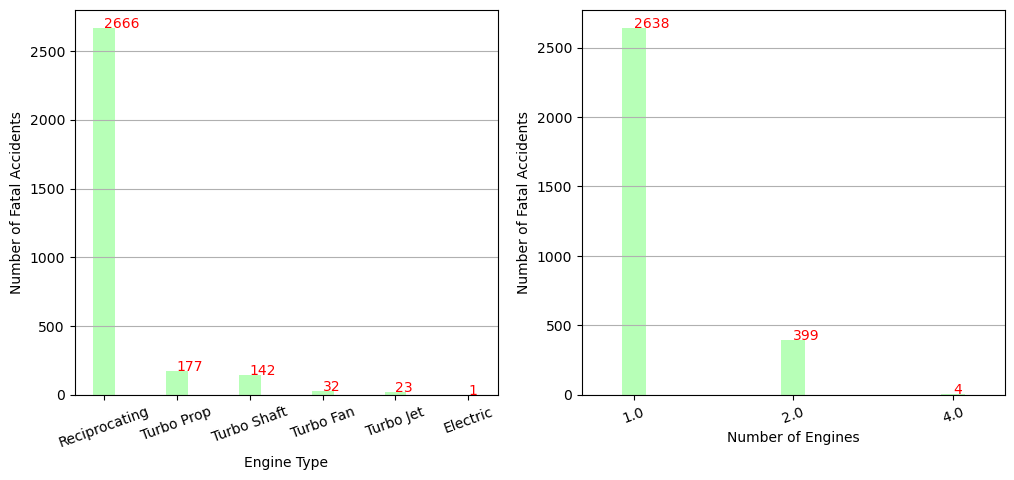

In [65]:
fig3,ax3=plt.subplots(1,2,figsize=(12,6))
grouped_by_eng_type = df_subset[(df_subset["Injury_severity"]=="Fatal") & (df_subset["Event_date"].dt.year>=2000)].groupby("Engine_type")
grouped_by_eng_count = df_subset[(df_subset["Injury_severity"]=="Fatal") & (df_subset["Event_date"].dt.year>=2000)].groupby("Number_of_engines")

grouped_by_eng_type.size().sort_values(ascending=False).plot(kind="bar",ax=ax3[0],ylabel="Number of Fatal Accidents",xlabel="Engine Type",width=0.3,color='#99ff99',alpha=0.7,figsize=(12,6));
grouped_by_eng_count.size().sort_values(ascending=False).plot(kind="bar",ax=ax3[1],ylabel="Number of Fatal Accidents",xlabel="Number of Engines",width=0.15,color='#99ff99',alpha=0.7,figsize=(12,5));

ax3[0].grid(axis="y")
ax3[1].grid(axis="y")
ax3[0].set_xticklabels(grouped_by_eng_type.size().sort_values(ascending=False).index, rotation=20)
ax3[1].set_xticklabels(grouped_by_eng_count.size().sort_values(ascending=False).index, rotation=20)

# Add counts to each bar
for i in ax3[0].patches:
    ax3[0].text(i.get_x() + i.get_width()/2, i.get_height() + 0.08, 
            str(round(i.get_height(), 2)), fontsize=10, color="red")
    
for i in ax3[1].patches:
    ax3[1].text(i.get_x() + i.get_width()/2, i.get_height() + 0.08, 
            str(round(i.get_height(), 2)), fontsize=10, color="red")    

plt.savefig("./figures/effect_of_engine.png")

**Observations:**
1. Most fatal accidents correspond to aircrafts using reciprocating engines. Most small aircrafts use reciprocating engines. 
2. As the number of engines increases, the number of fatal accidents decreases. 

### 4.4. Make and Model

We will study the effect of make and model with two visualizations: first, we will visualize the worst make and model pair in terms of safety. Then we will visualize the number of fatal accidents for each factor separately to identify the worst make and worst model 

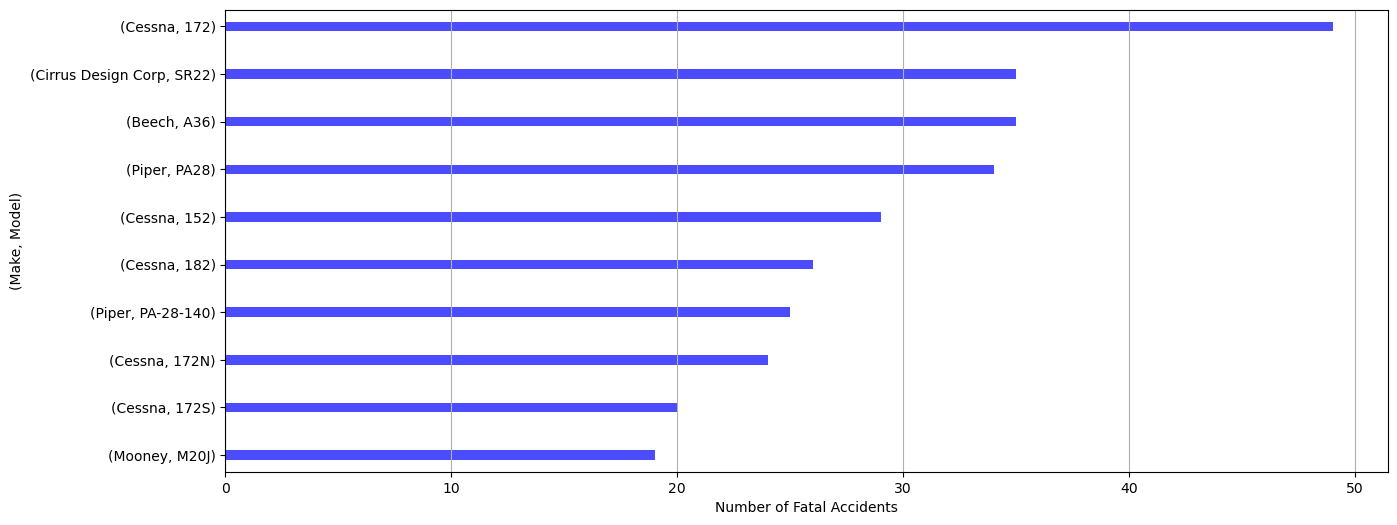

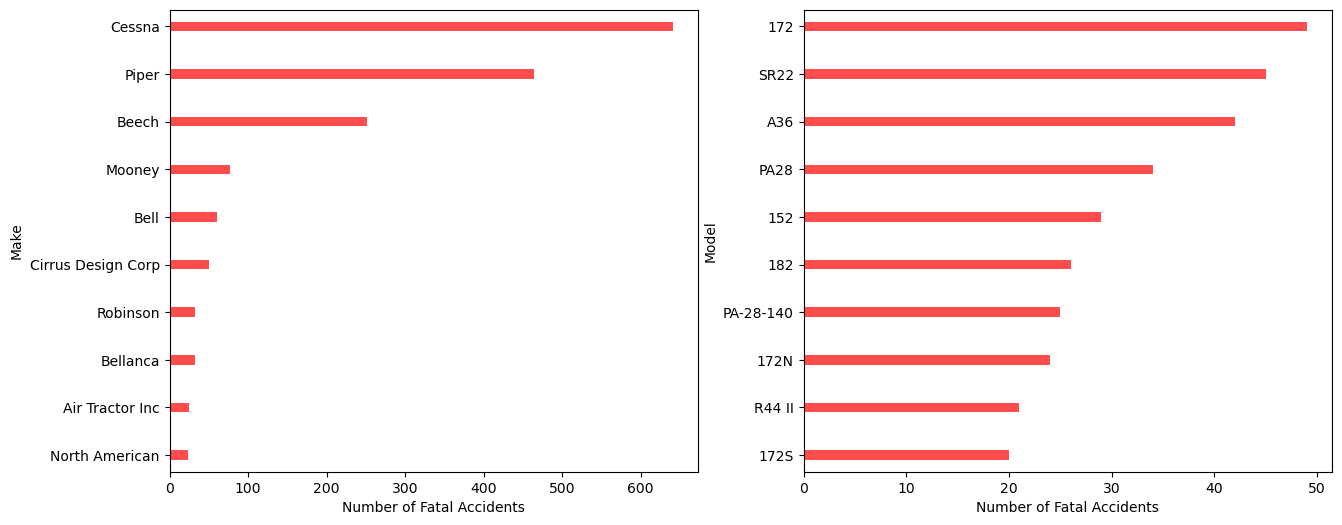

In [66]:
grouped_by_mm = df_subset[(df_subset["Injury_severity"]=="Fatal") & (df_subset["Event_date"].dt.year>=2000)].groupby(["Make","Model"])
ax4=(grouped_by_mm.size().sort_values(ascending=False)[:10][::-1]).plot(kind="barh",xlabel="Number of Fatal Accidents",ylabel="(Make, Model)", width=0.2,color="blue",alpha=0.7,figsize=(15,6));
ax4.grid(axis="x")
plt.savefig("./figures/effect_of_Make_and_Model_1.png")

grouped_by_make = df_subset[(df_subset["Injury_severity"]=="Fatal") & (df_subset["Event_date"].dt.year>=2000)].groupby("Make")
grouped_by_model = df_subset[(df_subset["Injury_severity"]=="Fatal") & (df_subset["Event_date"].dt.year>=2000)].groupby("Model")

fig5,ax5 = plt.subplots(1,2,figsize=(15,6))
(grouped_by_make.size().sort_values(ascending=False)[:10][::-1]).plot(kind="barh",ax=ax5[0],xlabel="Number of Fatal Accidents",ylabel="Make", width=0.2,color="red",alpha=0.7);
(grouped_by_model.size().sort_values(ascending=False)[:10][::-1]).plot(kind="barh",ax=ax5[1],xlabel="Number of Fatal Accidents",ylabel="Model", width=0.2,color="red",alpha=0.7);
plt.savefig("./figures/effect_of_Make_and_Model_2.png")


### 4.5. Weather (Month)

As a last factor, we consider grouping the data by month to see if any meaningful correlation exists between the number of fatal accidents and the time of travel (the granularity we consider is month). 

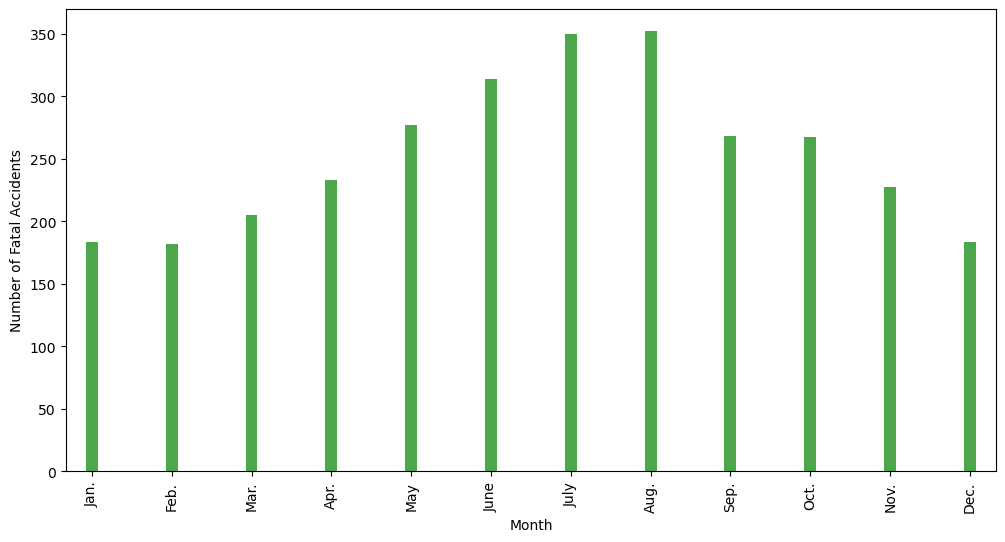

In [67]:
grouped_by_month = df_subset[(df_subset["Injury_severity"]=="Fatal") & (df_subset["Event_date"].dt.year>=2000)].groupby(df["Event_date"].dt.month)
ax6=grouped_by_month.size().plot(kind="bar",ylabel="Number of Fatal Accidents",xlabel="Month",width=0.15,color="green",alpha=0.7,figsize=(12,6));
month_labels = ["Jan.","Feb.","Mar.", "Apr.","May","June","July","Aug.","Sep.","Oct.","Nov.","Dec."]
ax6.set_xticklabels(month_labels);
plt.savefig("./figures/effect_of_month.png")

We recall that most accidents on this list are from small planes. During the months of good weather, when recreational flying increases, there seems to be more accidents. This plot does not show a clear relationship between the number of fatal accidents and months that have more extreme weather. 

### 4.5. Recommendations

Based on the analysis done above, the following recommendations for the stakeholders can be made: 
1. **California, Florida and Texas** are the top three states in terms of the number of fatal aviation accidents. Most fatal accidents in these states are associated with flights that are conducted for personal (recreational) or instructional purposes. Therefore, if we solely rely on the data available at hand, **it is not recommended to pursue business in these three states for recreational or instructional aircrafts**.  
2. Aircrafts with reciprocating engines are highly involved in fatal aviation accidents. This doesn't necessarily mean that reciprocating engines are the cause of fatal accidents. However, it does indicate a correlation. Therefore, it's not recommended to invest in aicrafts with reciprocating engines.
3. Aircrafts with higher number of engines seem to be safer in general. This is reasonable since having more engines ensures that the aircraft can remain operational in case one fails. Therefore, **it is recommended to be cautious about investing in small single-engine aircrafts.** 
4. **Cessna, Piper and Beech** are associated with the highest number of fatal accidents. However, when both make and model are considered, **Cirrus Design Corp, SR22** is also among aircrafts with the highest number of fatal accidents. **It is, therefore, recommended to avoid using these aircrafts.** 
5. Unlike an initial preconception that there may be more fatal accidents in months with extreme weather, **July and August** turn out to be the months with the highest number of fatal accidents. This observation may have an underlying cause: there are simply more flights taking place in these months. Regardless, **it seems reasonable to recommend that stakeholders expect and plan better for aviation incidents and accidents during these months.** 

## 5. Key Visualizations

<center><img src="./figures/effect_of_location.png"
            
**Figure 1.** Total number of fatal accidents in top 10 US states.  

<center><img src="./figures/effect_of_engine.png"
            
**Figure 2.** Total number of fatal accidents per engine type and aircraft's total number of engines. 

<center><img src="./figures/effect_of_Make_and_Model_1.png"
            
**Figure 3.** Total number of fatal accidents per the make and model combination of aircrafts. 

## 6. Limitations and Next Steps

The above study is limited in the following ways:
1. The analysis is limited to the United States.
2. In the absence of information on the total number of flights (including those without accidents), we're relying on the absolute number of fatal accidents as a metric for our analysis.

To improve the analysis, next steps include obtaining data on the total number of inbound/outbound flights to/from each state, the total number of flights per make and model as well as the total number of flights done per engine type and engine count in the aircrafts. This will enable us to use a more proper metric (normalized ratio of total number of fatal accidents per total flights done during a certain period of time). It may also be desirable to have data on the profitability of each business pursuit (for example, investing in aircrafts for recreational versus travel or instructional purposes). A category may seem to be associated with lots of fatal accidents. However, it may also be highly profitable such that the business wouldn't lose money overall. 

## 7. Dump Data for use in Tableau
Now that the analysis is done, we will dump the cleaned and reformatted dataset we used for analysis for use in a Tableau dashboard. 

In [72]:
file_name = "2404_Aviation_Data_Cleaned.csv"
df_subset.to_csv("./data/"+file_name)